In [1]:
import pandas as pd
import numpy as np

In [2]:
used_car=pd.read_csv('E:/file_of_python/used_car_Ebay_Kleinanzeigen/used-cars-database/autos.csv',encoding='latin-1')

In [3]:
print(used_car.head())

           dateCrawled                            name  seller offerType  \
0  2016-03-24 11:52:17                      Golf_3_1.6  privat   Angebot   
1  2016-03-24 10:58:45            A5_Sportback_2.7_Tdi  privat   Angebot   
2  2016-03-14 12:52:21  Jeep_Grand_Cherokee_"Overland"  privat   Angebot   
3  2016-03-17 16:54:04              GOLF_4_1_4__3TÜRER  privat   Angebot   
4  2016-03-31 17:25:20  Skoda_Fabia_1.4_TDI_PD_Classic  privat   Angebot   

   price abtest vehicleType  yearOfRegistration    gearbox  powerPS  model  \
0    480   test         NaN                1993    manuell        0   golf   
1  18300   test       coupe                2011    manuell      190    NaN   
2   9800   test         suv                2004  automatik      163  grand   
3   1500   test  kleinwagen                2001    manuell       75   golf   
4   3600   test  kleinwagen                2008    manuell       69  fabia   

   kilometer  monthOfRegistration fuelType       brand notRepairedDamage  

In [4]:
print('数据的大小：{}'.format(used_car.shape))

数据的大小：(371528, 20)


In [5]:
used_car=used_car.drop(['dateCrawled','offerType','abtest','name','nrOfPictures','postalCode'],axis=1)

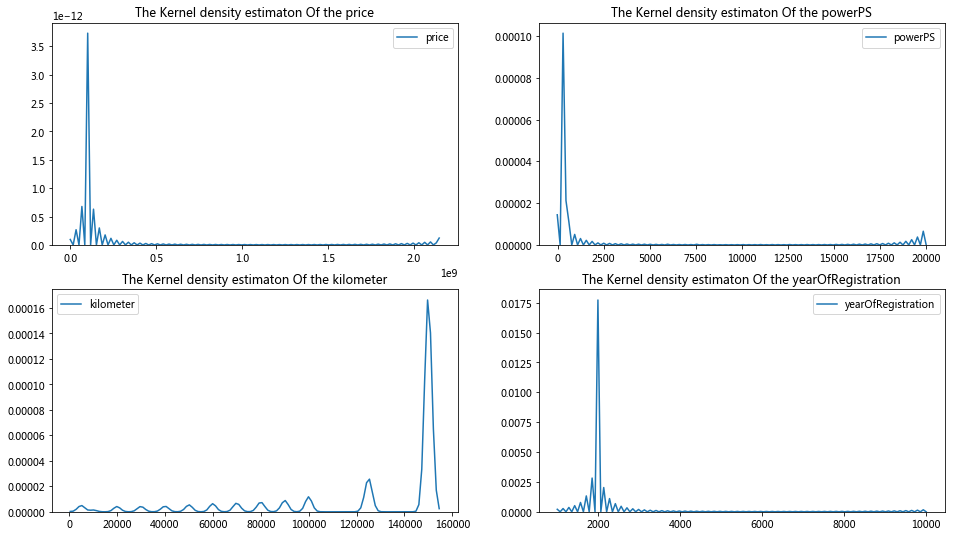

In [8]:
#先来看看数值型变量的分布的概况吧
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
sns.kdeplot(used_car['price'])
plt.title('The Kernel density estimaton Of the price')
plt.subplot(2,2,2)
sns.kdeplot(used_car['powerPS'])
plt.title('The Kernel density estimaton Of the powerPS')
plt.subplot(2,2,3)
sns.kdeplot(used_car['kilometer'])
plt.title('The Kernel density estimaton Of the kilometer')
plt.subplot(2,2,4)
sns.kdeplot(used_car['yearOfRegistration'])
plt.title('The Kernel density estimaton Of the yearOfRegistration')
plt.show()

In [9]:
import numpy as np
used_car=used_car[used_car['price']<80000]
used_car=used_car[used_car['price']>100]
used_car=used_car[used_car['powerPS']>0]
used_car=used_car[used_car['powerPS']<800]
used_car['yearOfRegistration']=used_car['yearOfRegistration'].astype('int')
used_car=used_car[used_car['yearOfRegistration']<2017]
used_car=used_car[used_car['yearOfRegistration']>np.percentile(used_car['yearOfRegistration'],5)] #取出登记年份大于前5%的百分位数
#这里，对于汽车已经行驶的公里数（kilometer）并未做任何处理。

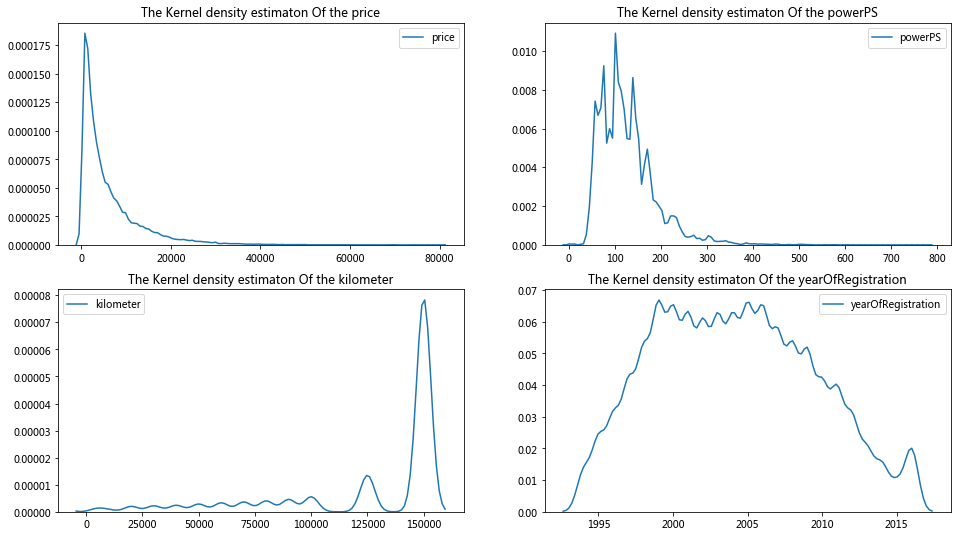

In [12]:
plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
sns.kdeplot(used_car['price'])
plt.title('The Kernel density estimaton Of the price')
plt.subplot(2,2,2)
sns.kdeplot(used_car['powerPS'])
plt.title('The Kernel density estimaton Of the powerPS')
plt.subplot(2,2,3)
sns.kdeplot(used_car['kilometer'])
plt.title('The Kernel density estimaton Of the kilometer')
plt.subplot(2,2,4)
sns.kdeplot(used_car['yearOfRegistration'])
plt.title('The Kernel density estimaton Of the yearOfRegistration')
plt.show()

In [13]:
print('各列缺失数据：\n{}'.format(used_car.isnull().sum(axis=0).sort_values(ascending=False)))

各列缺失数据：
notRepairedDamage      39427
fuelType               14197
vehicleType            10321
model                   9927
gearbox                 4916
lastSeen                   0
dateCreated                0
brand                      0
monthOfRegistration        0
kilometer                  0
powerPS                    0
yearOfRegistration         0
price                      0
seller                     0
dtype: int64


In [14]:
print(used_car['yearOfRegistration'].dtype)

int32


In [15]:
used_car['yearOfRegistration']=used_car['yearOfRegistration'].astype('str')
used_car['monthOfRegistration']=used_car['monthOfRegistration'].astype('str')
used_car['monthOfRegistration']=used_car['monthOfRegistration'].apply(lambda x:np.nan if x=='0' else x)
# 注册的月份不可能为0，将注册月份是0的值更改为NaN
used_car['RegistrationMonth']=used_car['yearOfRegistration']+'-'+used_car['monthOfRegistration']
used_car=used_car.drop(['yearOfRegistration','monthOfRegistration'],axis=1)
used_car=used_car.dropna(subset=['RegistrationMonth'])
used_car['dateCreated']=used_car['dateCreated'].map(lambda x: x.split(' ')[0])
used_car['lastSeen']=used_car['lastSeen'].map(lambda x: x.split(' ')[0])
used_car['lastSeenMonth']=used_car['lastSeen'].map(lambda x: x.split('-')[0])+'-'+used_car['lastSeen'].map(lambda x: x.split('-')[1])

In [16]:
print(used_car.head())

   seller  price vehicleType    gearbox  powerPS  model  kilometer fuelType  \
1  privat  18300       coupe    manuell      190    NaN     125000   diesel   
2  privat   9800         suv  automatik      163  grand     125000   diesel   
3  privat   1500  kleinwagen    manuell       75   golf     150000   benzin   
4  privat   3600  kleinwagen    manuell       69  fabia      90000   diesel   
5  privat    650   limousine    manuell      102    3er     150000   benzin   

        brand notRepairedDamage dateCreated    lastSeen RegistrationMonth  \
1        audi                ja  2016-03-24  2016-04-07            2011-5   
2        jeep               NaN  2016-03-14  2016-04-05            2004-8   
3  volkswagen              nein  2016-03-17  2016-03-17            2001-6   
4       skoda              nein  2016-03-31  2016-04-06            2008-7   
5         bmw                ja  2016-04-04  2016-04-06           1995-10   

  lastSeenMonth  
1       2016-04  
2       2016-04  
3       

In [17]:
# dateCreated_tuple=used_car['dateCreated'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))  #运行速度真的太慢了！弃用！
# lastSeen_tuple=used_car['lastSeen'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))
import datetime
dateCreated1=pd.to_datetime(used_car['dateCreated'])
lastSeen1=pd.to_datetime(used_car['lastSeen'])
used_car['DaysOfSellings']=lastSeen1-dateCreated1
used_car['DaysOfSellings']=used_car['DaysOfSellings'].astype('str')
used_car['DaysOfSellings']=used_car['DaysOfSellings'].apply(lambda x: x.split(' ')[0])
print(used_car.head())

   seller  price vehicleType    gearbox  powerPS  model  kilometer fuelType  \
1  privat  18300       coupe    manuell      190    NaN     125000   diesel   
2  privat   9800         suv  automatik      163  grand     125000   diesel   
3  privat   1500  kleinwagen    manuell       75   golf     150000   benzin   
4  privat   3600  kleinwagen    manuell       69  fabia      90000   diesel   
5  privat    650   limousine    manuell      102    3er     150000   benzin   

        brand notRepairedDamage dateCreated    lastSeen RegistrationMonth  \
1        audi                ja  2016-03-24  2016-04-07            2011-5   
2        jeep               NaN  2016-03-14  2016-04-05            2004-8   
3  volkswagen              nein  2016-03-17  2016-03-17            2001-6   
4       skoda              nein  2016-03-31  2016-04-06            2008-7   
5         bmw                ja  2016-04-04  2016-04-06           1995-10   

  lastSeenMonth DaysOfSellings  
1       2016-04             1

In [18]:
used_car['lastSeenMonth']=pd.to_datetime(used_car['lastSeenMonth'])
used_car['RegistrationMonth']=pd.to_datetime(used_car['RegistrationMonth'])  #, errors='coerce'
used_car=used_car[used_car['RegistrationMonth']<=used_car['lastSeenMonth']]
used_car['RegistrationDays']=used_car['lastSeenMonth']-used_car['RegistrationMonth']
print(used_car['RegistrationDays'].dtype)
print(used_car['RegistrationDays'].head())

timedelta64[ns]
1   1797 days
2   4261 days
3   5387 days
4   2831 days
5   7488 days
Name: RegistrationDays, dtype: timedelta64[ns]


In [19]:
used_car['RegistrationDays']=used_car['RegistrationDays'].astype('str')
used_car['RegistrationDays']=used_car['RegistrationDays'].apply(lambda x: x.split(' ')[0])
print(used_car['RegistrationDays'].head())  

1    1797
2    4261
3    5387
4    2831
5    7488
Name: RegistrationDays, dtype: object


In [20]:
used_car['RegistrationDays']=used_car['RegistrationDays'].astype('int')
used_car['RegistrationYears']=round(used_car['RegistrationDays']/365.0)
used_car=used_car.drop(['dateCreated','lastSeen','RegistrationMonth','lastSeenMonth','RegistrationDays'],axis=1)
print(used_car.head())

   seller  price vehicleType    gearbox  powerPS  model  kilometer fuelType  \
1  privat  18300       coupe    manuell      190    NaN     125000   diesel   
2  privat   9800         suv  automatik      163  grand     125000   diesel   
3  privat   1500  kleinwagen    manuell       75   golf     150000   benzin   
4  privat   3600  kleinwagen    manuell       69  fabia      90000   diesel   
5  privat    650   limousine    manuell      102    3er     150000   benzin   

        brand notRepairedDamage DaysOfSellings  RegistrationYears  
1        audi                ja             14                5.0  
2        jeep               NaN             22               12.0  
3  volkswagen              nein              0               15.0  
4       skoda              nein              6                8.0  
5         bmw                ja              2               21.0  


In [21]:
dict_vehicleType={'limousine':'轿车','kleinwagen':'小型轿车','kombi':'旅行车','bus':'公共汽车','cabrio':'敞篷车','coupe':'跑车','suv':'suv','andere':'其它'}
dict_seller={'privat':'个人','gewerblich':'广告商'}
dict_gearbox={'manuell':'手动','automatik':'自动'}
dict_fuelType={'diesel':'柴油','benzin':'汽油','lpg':'液化石油气','andere':'其它','hybrid':'混合型','cng':'压缩天然气','elektro':'电动'}
dict_notRepairedDamage={'ja':'否','nein':'是'}
used_car['vehicleType']=used_car['vehicleType'].replace(dict_vehicleType)
used_car['seller']=used_car['seller'].replace(dict_seller)
used_car['gearbox']=used_car['gearbox'].replace(dict_gearbox)
used_car['fuelType']=used_car['fuelType'].replace(dict_fuelType)
used_car['notRepairedDamage']=used_car['notRepairedDamage'].replace(dict_notRepairedDamage)
used_car.rename(columns={'seller':'商家','price':'价格','vehicleType':'车辆类型','gearbox':'变速器','powerPS':'马力(Ps)','model':'汽车型号','kilometer':'已行驶公里','fuelType':'燃料类型','brand':'车辆牌子','notRepairedDamage':'是否维修过','DaysOfSellings':'销售天数','RegistrationYears':'车龄(年)'},inplace=True)
print(used_car.head())

   商家     价格  车辆类型 变速器  马力(Ps)   汽车型号   已行驶公里 燃料类型        车辆牌子 是否维修过 销售天数  \
1  个人  18300    跑车  手动     190    NaN  125000   柴油        audi     否   14   
2  个人   9800   suv  自动     163  grand  125000   柴油        jeep   NaN   22   
3  个人   1500  小型轿车  手动      75   golf  150000   汽油  volkswagen     是    0   
4  个人   3600  小型轿车  手动      69  fabia   90000   柴油       skoda     是    6   
5  个人    650    轿车  手动     102    3er  150000   汽油         bmw     否    2   

   车龄(年)  
1    5.0  
2   12.0  
3   15.0  
4    8.0  
5   21.0  


In [22]:
used_car.to_csv('E:/file_of_python/used_car_Ebay_Kleinanzeigen/used_car.csv',index=None,encoding='utf_8')

In [23]:
import pandas as pd
used_car=pd.read_csv('E:/file_of_python/used_car_Ebay_Kleinanzeigen/used_car.csv')
print(used_car.head())

   商家     价格  车辆类型 变速器  马力(Ps)   汽车型号   已行驶公里 燃料类型        车辆牌子 是否维修过  销售天数  \
0  个人  18300    跑车  手动     190    NaN  125000   柴油        audi     否    14   
1  个人   9800   suv  自动     163  grand  125000   柴油        jeep   NaN    22   
2  个人   1500  小型轿车  手动      75   golf  150000   汽油  volkswagen     是     0   
3  个人   3600  小型轿车  手动      69  fabia   90000   柴油       skoda     是     6   
4  个人    650    轿车  手动     102    3er  150000   汽油         bmw     否     2   

   车龄(年)  
0    5.0  
1   12.0  
2   15.0  
3    8.0  
4   21.0  


In [ ]:
#*********************************************            车 辆 类 型       *********************************************************

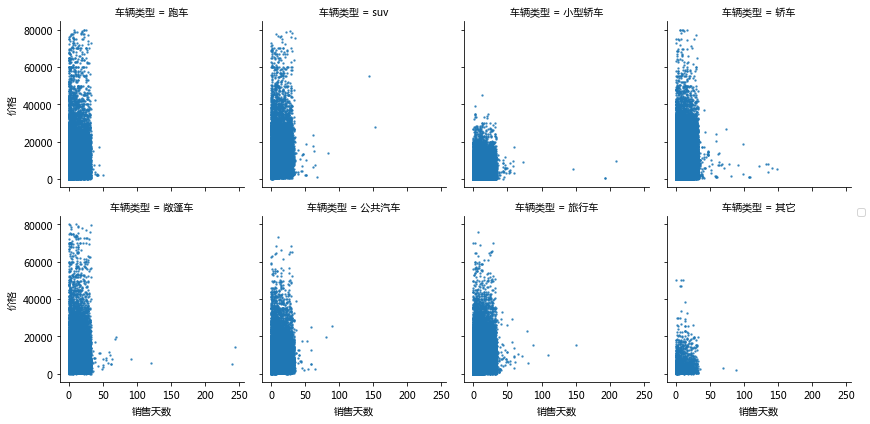

In [26]:
plt.figure()
g = sns.FacetGrid(used_car[["价格",'车辆类型','销售天数']], col="车辆类型",col_wrap=4)
g.map(plt.scatter, "销售天数", "价格", alpha=.7,s=2)  #s=2调节点的大小
g.add_legend()
plt.show()

#绝大部分的车在eBay网站上都能在40天内卖完。
#从图像可以看出，小型轿车的价格明显比其他类型的车辆低，跑车、敞篷车的价格比较高，接下来将进一步分析不同的车辆类型的价格关系。

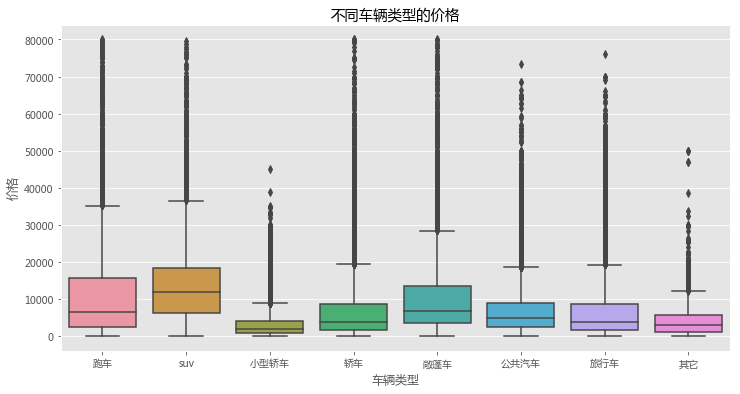

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #指定默认字体
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
sns.boxplot(x='车辆类型',y='价格',data=used_car)
plt.title('不同车辆类型的价格')
plt.show()
# 从箱线图可以看到SUV的价格最贵，跑车、敞篷车的价格也比较贵，而小型轿车的价格最便宜，轿车，公共汽车，旅行车价位适中。
#结合上一幅饼状图，不难发现，小轿车和轿车不仅卖的多，还便宜；SUV虽然卖价高，但是卖的数量并不多
#尽管数据已经做了处理，数据的离群值仍然较大。~

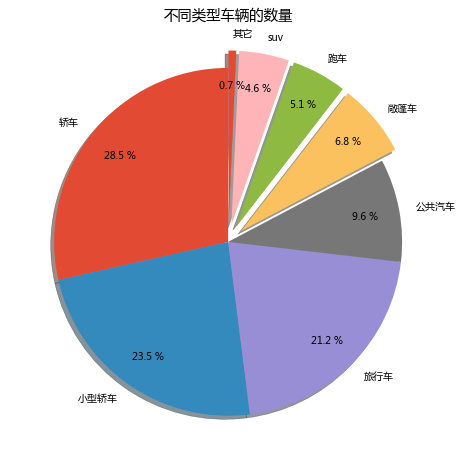

In [28]:
num_type=used_car['车辆类型'].value_counts()
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
explode = [ 0,0, 0, 0, 0.1, 0.1, 0.1,0.1] # 0.1 凸出这部分，
plt.axes(aspect=1)  # set this , Figure is round, otherwise it is an ellipse
plt.pie(x=list(num_type.values),labels=list(num_type.index),explode=explode,autopct='%3.1f %%',shadow=True, labeldistance=1.1, startangle = 90,pctdistance = 0.8)
plt.title("不同类型车辆的数量")
plt.show()
#从图像可以看出，在eBay网站上的车辆中的数量关系是：轿车>小型轿车>旅行车>敞篷车>跑车>SUV>其它

In [33]:
vehicleType_counts=pd.DataFrame(used_car['车辆类型'].value_counts())
vehicleType_attr=list(vehicleType_counts.index)
vehicleType_val=list(vehicleType_counts['车辆类型'])
print(vehicleType_attr)
print(vehicleType_val)

['轿车', '小型轿车', '旅行车', '公共汽车', '敞篷车', '跑车', 'suv', '其它']
[77151, 63555, 57227, 25877, 18391, 13859, 12567, 1926]


In [35]:
from pyecharts import Bar
vehicleType_counts=[77151, 63555, 57227, 25877, 18391, 13859, 12567, 1926]
bar = Bar("不同类型车辆的数量", "eBay网站")
bar.add("", vehicleType_attr,vehicleType_counts ,mark_line=["average"],is_label_show=True)
bar

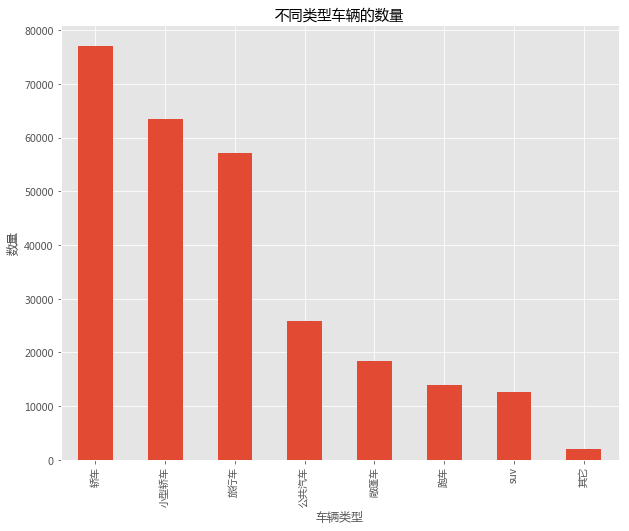

In [32]:
var = used_car['车辆类型'].value_counts()
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('车辆类型')
ax1.set_ylabel('数量')
ax1.set_title('不同类型车辆的数量')
var.plot(kind='bar')
plt.show()

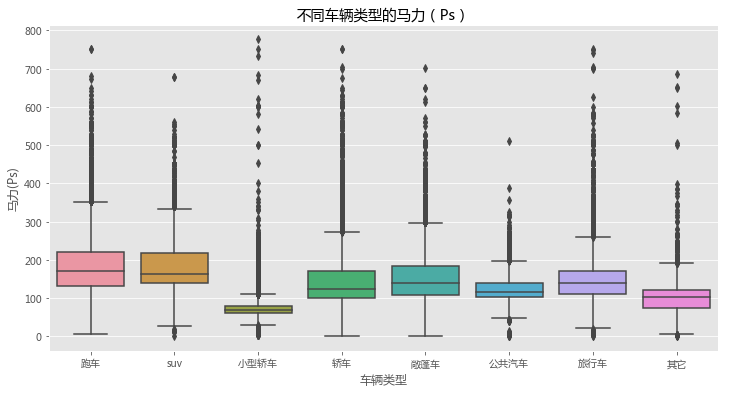

In [36]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #指定默认字体
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
sns.boxplot(x='车辆类型',y='马力(Ps)',data=used_car)
plt.title('不同车辆类型的马力（Ps）')
plt.show()
# 从图像可以看出大部分的车马力较为集中（100Ps~220Ps）,除了小型轿车的马力普遍较小（80PS左右）

In [ ]:
#*************************************************    变 速 器    ******************************************************************

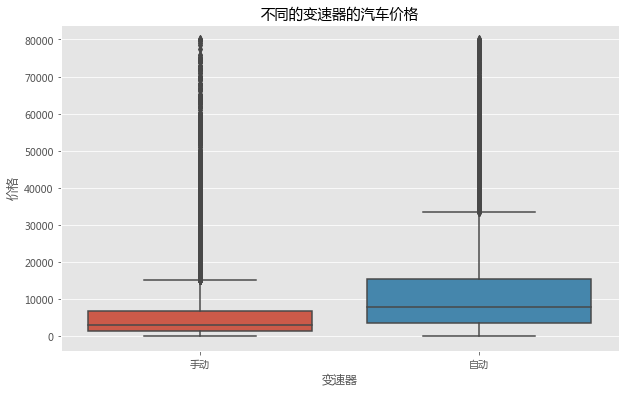

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot("变速器", '价格',data=used_car) 
plt.title('不同的变速器的汽车价格')
plt.show()
#从图中可以清晰地看到变速器的类型是自动的汽车普遍要比变速器的类型是手动的汽车要贵

In [38]:
gearbox=pd.DataFrame(used_car['变速器'].value_counts())
gearbox_index=list(gearbox.index)
gearbox_values=list(gearbox['变速器'].values)
print(gearbox_index)
print(gearbox_values)

['手动', '自动']
[207916, 62959]


In [39]:
gearbox_mamo=pd.DataFrame(used_car[used_car['变速器']=='手动']['车辆类型'].value_counts())
gearbox_mamo.rename(columns={'车辆类型':'车辆类型(手动)'})
gearbox_auto=pd.DataFrame(used_car[used_car['变速器']=='自动']['车辆类型'].value_counts())
gearbox_auto.rename(columns={'车辆类型':'车辆类型(自动)'},inplace=True)
gearbox=pd.merge(gearbox_mamo,gearbox_auto,left_index=True,right_index=True)
print(gearbox)
gearbox.rename(columns={'车辆类型':'车辆类型(手动)'},inplace=True)
gearbox_index=list(gearbox.index)
gearbox_mamo_values=list(gearbox['车辆类型(手动)'])
gearbox_auto_values=list(gearbox['车辆类型(自动)'])
print(gearbox_index)
print(gearbox_mamo_values)
print(gearbox_auto_values)

       车辆类型  车辆类型(自动)
小型轿车  57282      5031
轿车    55671     20857
旅行车   40920     15853
公共汽车  21182      4447
敞篷车   13231      4871
跑车     8983      4728
suv    6042      6450
其它     1691       208
['小型轿车', '轿车', '旅行车', '公共汽车', '敞篷车', '跑车', 'suv', '其它']
[57282, 55671, 40920, 21182, 13231, 8983, 6042, 1691]
[5031, 20857, 15853, 4447, 4871, 4728, 6450, 208]


In [40]:
from pyecharts import Bar
v1 = [57282, 55671, 40920, 21182, 13231, 8983, 6042, 1691]
v2 = [5031, 20857, 15853, 4447, 4871, 4728, 6450, 208]
bar = Bar("不同车辆类型是变速器类型", "eBay网站")
bar.add("手动", gearbox_index, v1, mark_line=["average"], mark_point=["max", "min"])
bar.add("自动", gearbox_index, v2, mark_line=["average"], mark_point=["max", "min"])
bar
#图像中，大部分车辆的变速器类型还是手动的，尤其是小型轿车的变速器绝大多数是手动的，
#而SUV的手动变速器和自动变速器的汽车数量基本持平，这也SUV比其他类型的车要贵一些的一个原因

In [ ]:
#***********************************************      燃 料 类 型    ***************************************************************

In [44]:
from pyecharts import Bar
gearbox_counts=pd.DataFrame(used_car['燃料类型'].value_counts())
gearbox_counts_attr=list(gearbox_counts.index)
print(gearbox_counts_attr)
print(list(gearbox_counts['燃料类型']))

['汽油', '柴油', '液化石油气', '压缩天然气', '混合型', '电动', '其它']
[168394, 91944, 4229, 465, 237, 73, 49]


In [45]:
vehicleType_counts=[168394, 91944, 4229, 465, 237, 73, 49]
bar = Bar("燃料类型的汽车数量", "FuelType")
bar.add("", gearbox_counts_attr,vehicleType_counts ,mark_line=["average"],is_label_show=True)
bar

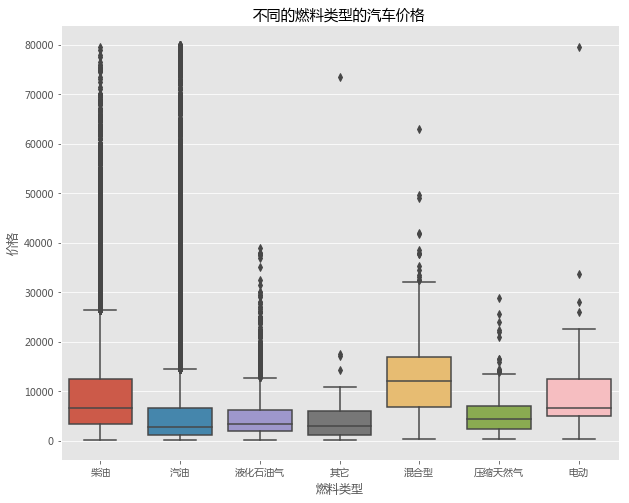

In [46]:
#FuelType=used_car['燃料类型']
plt.figure(figsize=(10,8))
sns.boxplot("燃料类型", '价格',data=used_car) 
plt.title('不同的燃料类型的汽车价格')
plt.show()
dict_fuelType={'diesel':'柴油','benzin':'汽油','lpg':'液化石油气','andere':'其它','hybrid':'混合型','cng':'压缩天然气','elektro':'电动'}

# 混合型燃料的汽车的价格较高，柴油型、电动型汽车紧随其次，而汽油型、液化石油气型、压缩天然气型的汽车价格基本持平。

In [ ]:
#*************************************    是 否 维 修 过    ******************************************************

In [47]:
repaire_yes=pd.DataFrame(used_car[used_car['是否维修过']=='是']['车辆类型'].value_counts())
repaire_no=pd.DataFrame(used_car[used_car['是否维修过']=='否']['车辆类型'].value_counts())
repaire_yes_index=list(repaire_yes.index)
repaire_yes_values=list(repaire_yes['车辆类型'])
repaire_no_index=list(repaire_no.index)
repaire_no_values=list(repaire_no['车辆类型'])
print(repaire_yes_index)
print(repaire_yes_values)
print(repaire_no_index)
print(repaire_no_values)

['轿车', '小型轿车', '旅行车', '公共汽车', '敞篷车', '跑车', 'suv', '其它']
[62938, 49175, 45575, 21448, 16075, 11388, 10946, 1150]
['轿车', '小型轿车', '旅行车', '公共汽车', '跑车', '敞篷车', 'suv', '其它']
[6382, 5982, 5523, 2328, 1040, 853, 703, 267]


In [119]:
from pyecharts import Bar
v1 = [6382, 5982, 5523, 2328, 1040, 853, 703, 267]
v2 = [62938, 49175, 45575, 21448, 16075, 11388, 10946, 1150]
bar = Bar("不同车辆类型是否维修过情况", "eBay网站")
bar.add("是", repaire_yes_index, v1, mark_line=["average"], mark_point=["max", "min"])
bar.add("否", repaire_yes_index, v2, mark_line=["average"], mark_point=["max", "min"])
bar
#从图中可以看出，不论是什么车型，没有维修过的车占据了绝大多数，而维修过的车所占比例很小

In [ ]:
#*****************************************    销 售 天 数   and    车 龄 (年) ******************************************************

In [141]:
print('登记到eBay网站后当天卖出的车辆数：{}'.format(len(used_car[used_car['销售天数']==0])))
print('占总的车辆数的{}'.format(len(used_car[used_car['销售天数']==0])*1.0/len(used_car)))

登记到eBay网站后当天卖出的车辆数：35240
占总的车辆数的0.12887323686125648


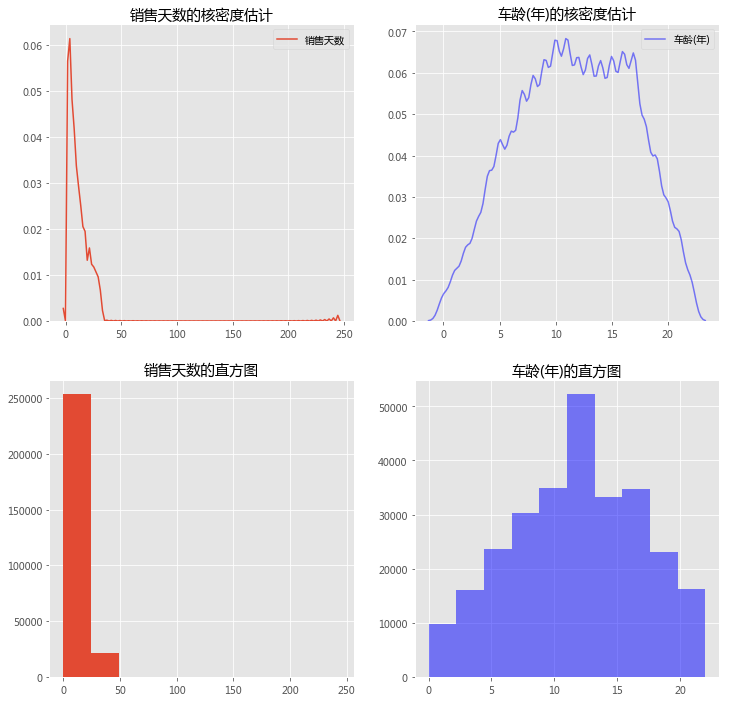

In [21]:
plt.figure(figsize=(10,10))
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.subplot(2,2,1)
sns.kdeplot(used_car['销售天数'])
plt.title('销售天数的核密度估计')          
plt.subplot(2,2,2)
sns.kdeplot(used_car['车龄(年)'],color='b',alpha=0.5)
plt.title('车龄(年)的核密度估计')          
plt.subplot(2,2,3)
used_car['销售天数'].hist()
plt.title('销售天数的直方图')       
plt.subplot(2,2,4)
used_car['车龄(年)'].hist(color='b',alpha=0.4)
plt.title('车龄(年)的直方图')
plt.show()
#从图像可以看出，eBay网站上的车辆绝大多数的车20天就能卖掉
#从第二幅图可以看出，eBay网站上的车很多比较陈旧，在10年~17年的居多

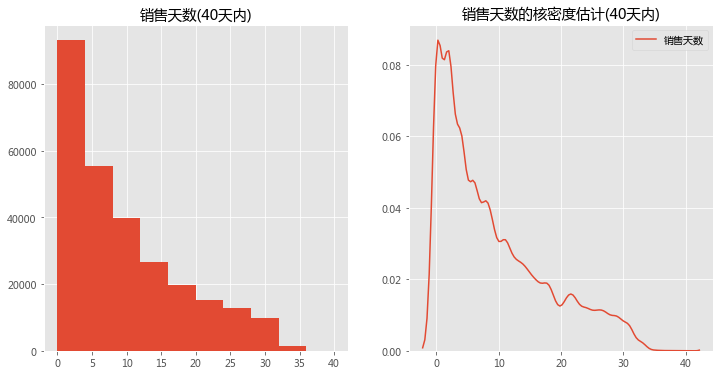

In [30]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
used_car[used_car['销售天数']<=40]['销售天数'].hist()
plt.title('销售天数(40天内)')
plt.subplot(1,2,2)
sns.kdeplot(used_car[used_car['销售天数']<=40]['销售天数'])
plt.title('销售天数的核密度估计(40天内)')
plt.show()

In [65]:
print('在40天内销售出的汽车占总数量的：', '%.2f%%' % (len(used_car[used_car['销售天数']<=40])/len(used_car)*100))
print('在10天内销售出的汽车占总数量的：', '%.2f%%' % (len(used_car[used_car['销售天数']<=10])/len(used_car)*100))
print('在7天内销售出的汽车占总数量的：', '%.2f%%' % (len(used_car[used_car['销售天数']<=7])/len(used_car)*100))
print('在6天内销售出的汽车占总数量的：', '%.2f%%' % (len(used_car[used_car['销售天数']<=6])/len(used_car)*100))

#可以看出ebay网站上的一半以上的的车在不到一周的时间就可以卖出去，而几乎所有的车40天就可以卖出去了。

在40天内销售出的汽车占总数量的： 99.92%
在10天内销售出的汽车占总数量的： 65.10%
在7天内销售出的汽车占总数量的： 54.14%
在6天内销售出的汽车占总数量的： 50.75%


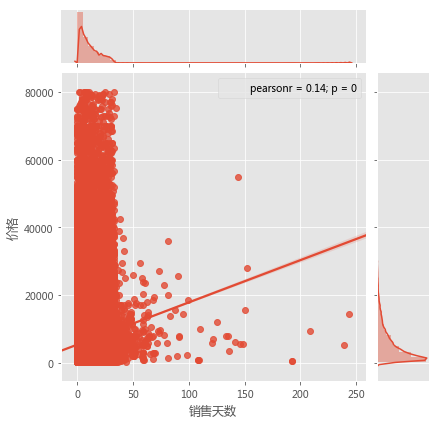

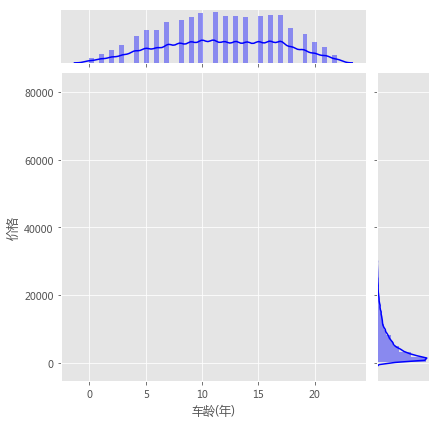

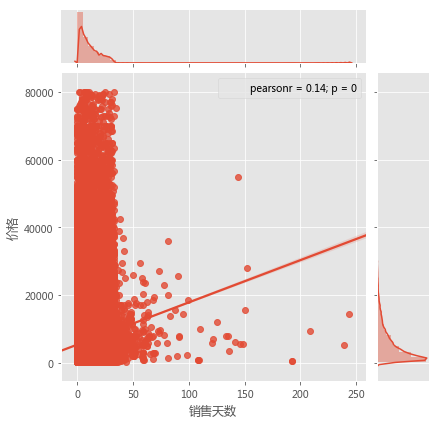

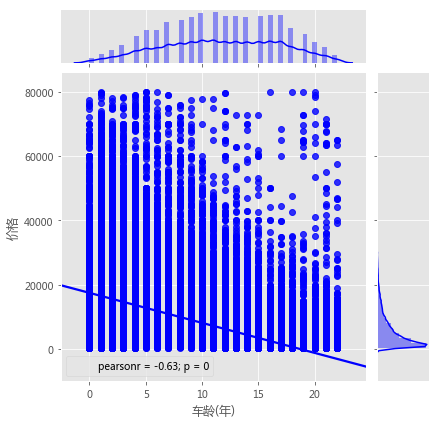

In [44]:
plt.figure()
sns.jointplot( "销售天数", "价格",used_car,kind='reg') 
plt.figure()
sns.jointplot( "车龄(年)", "价格",used_car,kind='reg',color='b') 
plt.show()

#从图像可以看出，销售天数越大，价格越高
#从图像可以看出，车龄(年)越大，价格越低

In [60]:
# from scipy.stats import normaltest
# print(normaltest(used_car['马力(Ps)']))
# #检验结果显示，pvalue=0.0，数据不满足正态分布的假设

NormaltestResult(statistic=105501.93275300245, pvalue=0.0)


In [ ]:
#**********************************************      车 辆 牌 子      **************************************************************

In [48]:
top10=used_car['车辆牌子'].value_counts().sort_values(ascending=False).head(10)
print(list(top10.index))
print(list(top10.values))

['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford', 'renault', 'peugeot', 'fiat', 'seat']
[56602, 31854, 28385, 26257, 25907, 18596, 12552, 8616, 6741, 5518]


In [49]:
from pyecharts import Bar
attr = ['大众', '宝马','奔驰' , '欧宝', '奥迪', '福特', '雷诺', '标致', '菲亚特', '西特']
vehicleType_counts=[56602, 31854, 28385, 26257, 25907, 18596, 12552, 8616, 6741, 5518]
bar = Bar("销售量前10的汽车商标", "Top10")
bar.add("", attr,vehicleType_counts ,mark_line=["average"],is_label_show=True)
bar
#大众汽车以绝对性的优势占领eBay网站的销售冠军

In [50]:
brand_counts=used_car1['车辆牌子'].value_counts().sort_values(ascending=False)
print(list(brand_counts.index))
print(list(brand_counts.values))

['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford', 'renault', 'peugeot', 'fiat', 'seat', 'skoda', 'smart', 'mazda', 'citroen', 'toyota', 'nissan', 'mini', 'hyundai', 'volvo', 'mitsubishi', 'kia', 'honda', 'alfa_romeo', 'suzuki', 'porsche', 'sonstige_autos', 'chevrolet', 'chrysler', 'dacia', 'land_rover', 'jeep', 'subaru', 'daihatsu', 'jaguar', 'saab', 'daewoo', 'lancia', 'rover', 'lada', 'trabant']
[56602, 31854, 28385, 26257, 25907, 18596, 12552, 8616, 6741, 5518, 4891, 4265, 4238, 3862, 3797, 3675, 3035, 3023, 2569, 2208, 2078, 1999, 1720, 1693, 1426, 1401, 1241, 1051, 773, 613, 572, 552, 535, 460, 405, 374, 318, 316, 125, 5]


In [58]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
from pyecharts import WordCloud
name =['大众',  '宝马', '欧宝','奔驰' , '奥迪', '福特', '雷诺', '标致', '菲亚特', '西特', '斯柯达','智能','马自达',
       '雪铁龙','丰田','日产','迷你','现代','沃尔沃','三菱','起亚','本田', '阿尔法罗密欧','铃木','保时捷','其它',
       '雪佛兰','克莱斯勒', '达卡','兰德','吉普车','斯巴鲁','大发','美洲虎','萨博', '大宇','蓝旗',
       '流浪者', '拉达', '特拉班特']
value =[56602, 31854, 28385, 26257, 25907, 18596, 12552, 8616, 6741, 5518, 4891, 4265, 4238, 3862, 3797, 3675, 3035, 3023, 2569, 2208, 2078, 1999, 1720, 1693, 1426, 1401, 1241, 1051, 773, 613, 572, 552, 535, 460, 405, 374, 318, 316, 125, 5]
wordcloud =WordCloud(width=1000, height=500)
wordcloud.add("eBay网站二手车销量的词云图", name, value, word_size_range=[20, 150],shape='diamond')
wordcloud

In [ ]:
#****************************************************      商 家    ****************************************************************

In [127]:
seller_counts=used_car['商家'].value_counts()
import pandas as pd
#seller_counts=pd.DataFrame(seller_counts)
seller_counts_val=list(seller_counts.values) #['商家类型']
seller_counts_attr=list(seller_counts.index)
print(seller_counts_attr)
print(seller_counts_val)

['个人', '广告商']
[273446, 1]


In [67]:
from pyecharts import Pie
import numpy as np
pie=Pie('商家类型')
attr=['个人','广告商']
val=[315324, 1]
pie.add('',attr,val,is_label_show=True)
pie
#由饼状图可以看出，eBay网站上的大部分商家是以个人（315324辆）的形式出售二手车的，只有1辆车是广告商的形式出现的。

In [153]:
print(used_car.head())

   商家     价格  车辆类型 变速器  马力(Ps)   汽车型号   已行驶公里 燃料类型        车辆牌子 是否维修过  销售天数  \
0  个人  18300    跑车  手动     190    NaN  125000   柴油        audi     是    14   
1  个人   9800   suv  自动     163  grand  125000   柴油        jeep   NaN    22   
2  个人   1500  小型轿车  手动      75   golf  150000   汽油  volkswagen     否     0   
3  个人   3600  小型轿车  手动      69  fabia   90000   柴油       skoda     否     6   
4  个人    650    轿车  手动     102    3er  150000   汽油         bmw     是     2   

   车龄(年)  
0    5.0  
1   12.0  
2   15.0  
3    8.0  
4   21.0  


In [45]:
used_car=used_car.drop(['商家','汽车型号'],axis=1)
print(used_car.head())

      价格  车辆类型 变速器  马力(Ps)   已行驶公里 燃料类型        车辆牌子 是否维修过  销售天数  车龄(年)
0  18300    跑车  手动     190  125000   柴油        audi     否    14    5.0
1   9800   suv  自动     163  125000   柴油        jeep   NaN    22   12.0
2   1500  小型轿车  手动      75  150000   汽油  volkswagen     是     0   15.0
3   3600  小型轿车  手动      69   90000   柴油       skoda     是     6    8.0
4    650    轿车  手动     102  150000   汽油         bmw     否     2   21.0


In [50]:
used_car=used_car.drop(['车辆牌子'],axis=1)
print(used_car.shape)
used_car=used_car.dropna(axis=0, how='any')
print(used_car.shape)
print(used_car.head(10))

(274248, 9)
(234593, 9)
       价格  车辆类型 变速器  马力(Ps)   已行驶公里 燃料类型 是否维修过  销售天数  车龄(年)
0   18300    跑车  手动     190  125000   柴油     否    14    5.0
2    1500  小型轿车  手动      75  150000   汽油     是     0   15.0
3    3600  小型轿车  手动      69   90000   柴油     是     6    8.0
4     650    轿车  手动     102  150000   汽油     否     2   21.0
5    2200   敞篷车  手动     109  150000   汽油     是     4   12.0
7    2000    轿车  手动     105  150000   汽油     是    11   11.0
8    2799   旅行车  手动     140  150000   柴油     否     0   10.0
11  17999   suv  手动     190   70000   柴油     是    16    5.0
12   1750  小型轿车  自动      75  150000   汽油     是    17   12.0
13   7550  公共汽车  手动     136  150000   柴油     是    13    9.0


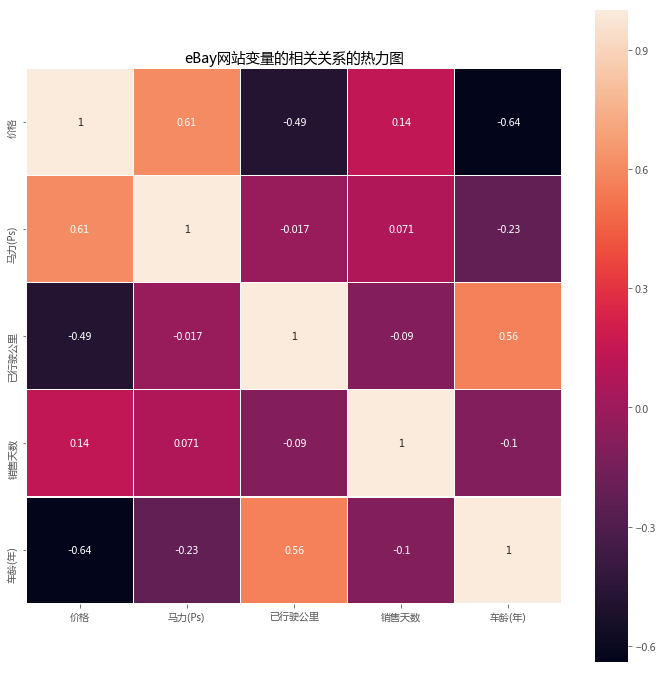

In [58]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
plt.style.use('ggplot')
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
corrmat = used_car.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)
plt.title('eBay网站变量的相关关系的热力图')
plt.show()
#从图中可以看出，eBay网站上的车辆的相关性：
#‘价格’与‘马力Ps’中度显著正相关，即，如果马力（PS）的值越大，越容易卖个好价钱
#‘价格’与‘车龄（年）’中度显著负相关，即，如果车龄越大，越不容易卖个好价钱
#‘价格’与‘已行驶公里’低度负相关，即，如果已行驶公里的值越大，越不容易卖个好价钱

In [52]:
used_car.to_csv('E:/file_of_python/used_car_Ebay_Kleinanzeigen/used_car1.csv',index=None,encoding='utf_8')

In [53]:
import pandas as pd
used_car1=pd.read_csv('E:/file_of_python/used_car_Ebay_Kleinanzeigen/used_car1.csv')

In [54]:
VehicalType=pd.get_dummies(used_car1['车辆类型'])
used_car1=pd.concat([used_car1,VehicalType],axis=1)
def greaxbox_fun(x):
    if x=='手动':
        x=0
    elif x=='自动':
         x=1
    return x  
used_car1['变速器']=used_car1['变速器'].apply(greaxbox_fun)
#used_car1['变速器']=used_car1['变速器'].astype(int)
FuelType=pd.get_dummies(used_car1['燃料类型'])
used_car1=pd.concat([used_car1,FuelType],axis=1)
def repaired_fun(x):
    if x=='否':
        x=0
    elif x=='是':
         x=1
    return x
used_car1['是否维修过']=used_car1['是否维修过'].apply(repaired_fun)
used_car1=used_car1.drop(['车辆类型','燃料类型'],axis=1)
print(used_car1.head())

      价格  变速器  马力(Ps)   已行驶公里  是否维修过  销售天数  车龄(年)  suv  公共汽车  其它 ...  旅行车  跑车  \
0  18300    0     190  125000      0    14    5.0    0     0   0 ...    0   1   
1   1500    0      75  150000      1     0   15.0    0     0   0 ...    0   0   
2   3600    0      69   90000      1     6    8.0    0     0   0 ...    0   0   
3    650    0     102  150000      0     2   21.0    0     0   0 ...    0   0   
4   2200    0     109  150000      1     4   12.0    0     0   0 ...    0   0   

   轿车  其它  压缩天然气  柴油  汽油  液化石油气  混合型  电动  
0   0   0      0   1   0      0    0   0  
1   0   0      0   0   1      0    0   0  
2   0   0      0   1   0      0    0   0  
3   1   0      0   0   1      0    0   0  
4   0   0      0   0   1      0    0   0  

[5 rows x 22 columns]


In [55]:
used_car1=used_car1.drop(['其它'],axis=1)
print(used_car1.shape)

(234593, 20)


In [56]:
print(used_car1.columns)

Index(['价格', '变速器', '马力(Ps)', '已行驶公里', '是否维修过', '销售天数', '车龄(年)', 'suv', '公共汽车',
       '小型轿车', '敞篷车', '旅行车', '跑车', '轿车', '压缩天然气', '柴油', '汽油', '液化石油气', '混合型',
       '电动'],
      dtype='object')


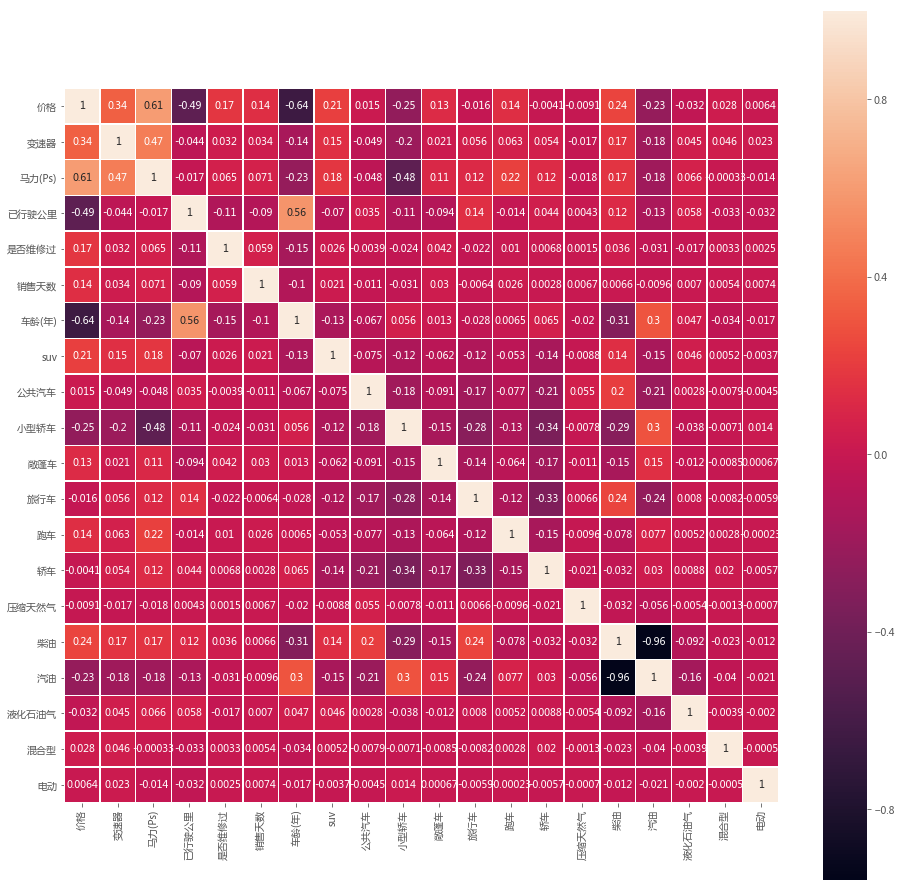

In [73]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
plt.style.use('ggplot')
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
corrmat = used_car1.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)
plt.title('eBay网站变量的相关关系的热力图')
plt.show()
#从图中可以看出，eBay网站上的车辆的相关性：
#‘价格’与‘马力Ps’中度显著正相关，即，如果马力（PS）的值越大，越容易卖个好价钱
#‘价格’与‘车龄（年）’中度显著负相关，即，如果车龄越大，越不容易卖个好价钱
#‘价格’与‘已行驶公里’低度负相关，即，如果已行驶公里的值越大，越不容易卖个好价钱
#‘价格’与‘变速器’低度正相关，根据前面的分析，变速器’在某种程度上影响价格，但并不绝对。

#同时，‘汽油’和‘柴油’的呈现高度负相关的关系，这种关系如果用经济学术语可以说：两者互为替代品
#‘小型轿车’和马力Ps’低度负相关，结合上面的分析，这是由于‘小型轿车’的马力总体来说是所有车型中最小的。

In [57]:
used_car1.to_csv('E:/file_of_python/used_car_Ebay_Kleinanzeigen/used_car2.csv',index=None,encoding='utf_8')